In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


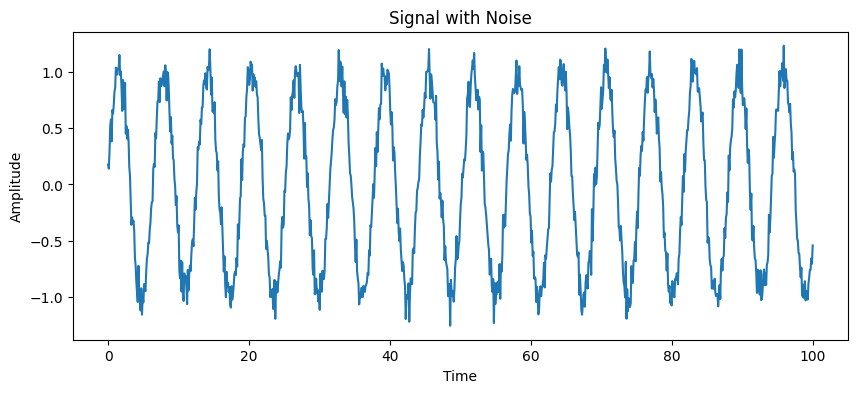

In [4]:
# تولید سیگنال سینوسی با نویز
np.random.seed(0)
time_steps = np.linspace(0, 100, 1000)
signal = np.sin(time_steps) + 0.1 * np.random.randn(len(time_steps))

plt.figure(figsize=(10,4))
plt.plot(time_steps, signal)
plt.title("Signal with Noise")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [5]:
# نرمال‌سازی بین 0 و 1
scaler = MinMaxScaler(feature_range=(0, 1))
signal_scaled = scaler.fit_transform(signal.reshape(-1, 1))

# ساخت داده‌های X و y
window_size = 10
X, y = [], []

for i in range(len(signal_scaled) - window_size):
    X.append(signal_scaled[i:i+window_size])
    y.append(signal_scaled[i+window_size])

X, y = np.array(X), np.array(y)

# تقسیم داده به آموزش و تست
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [6]:
#  تنظیم هایپرپارامترها 
window_size = 10   # طول پنجره زمانی
lstm_units = 50    # تعداد واحدهای LSTM
batch_size = 32    # اندازه بچ
epochs = 20        # تعداد اپوک

print(f"Hyperparameters -> window_size: {window_size}, LSTM units: {lstm_units}, batch_size: {batch_size}, epochs: {epochs}")


Hyperparameters -> window_size: 10, LSTM units: 50, batch_size: 32, epochs: 20


In [7]:
model = Sequential()
model.add(LSTM(50, input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


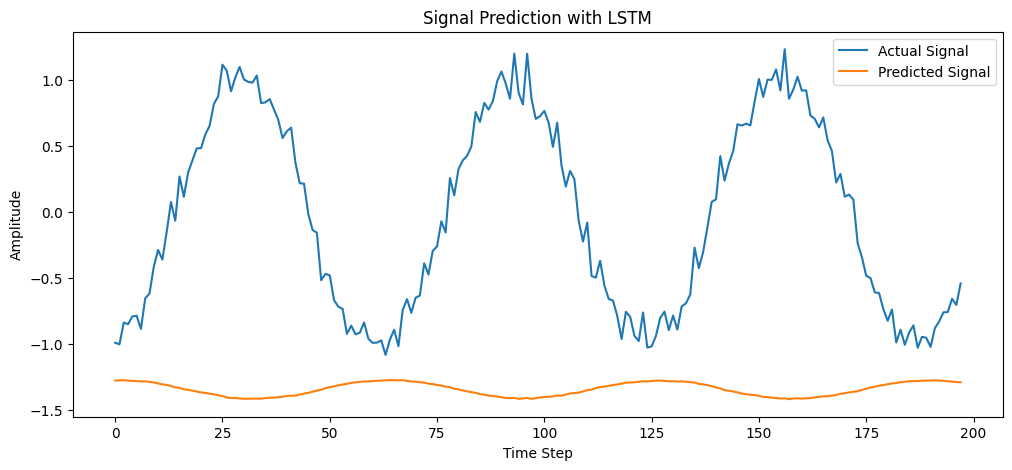

In [8]:
y_pred = model.predict(X_test)

# معکوس نرمال‌سازی برای نمایش واقعی
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual Signal")
plt.plot(y_pred_inv, label="Predicted Signal")
plt.title("Signal Prediction with LSTM")
plt.xlabel("Time Step")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
rmse = np.sqrt(mse)
print("MSE:", mse, "MAE:", mae)


MSE: 2.3097365059781154 MAE: 1.3089469490067263


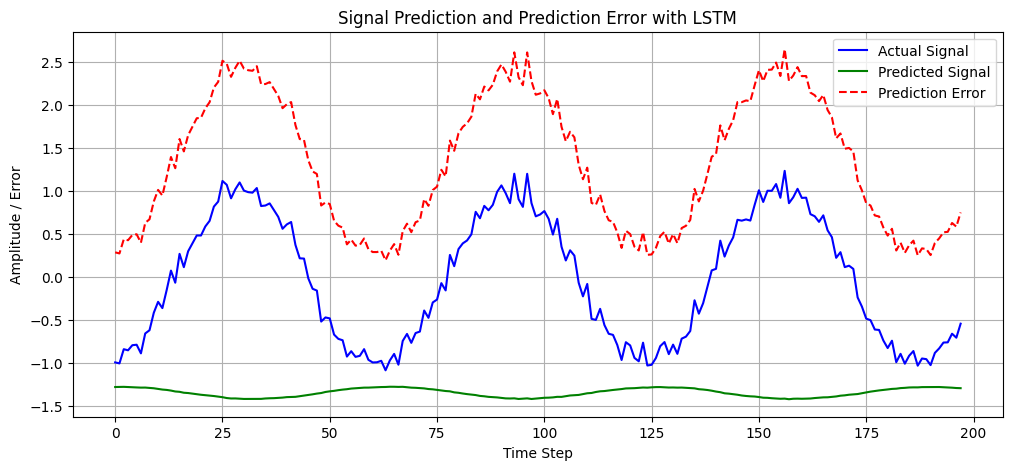

In [10]:
import matplotlib.pyplot as plt

errors = y_test_inv.flatten() - y_pred_inv.flatten()

plt.figure(figsize=(12,5))
plt.plot(y_test_inv, label="Actual Signal", color='blue')
plt.plot(y_pred_inv, label="Predicted Signal", color='green')
plt.plot(errors, label="Prediction Error", color='red', linestyle='--')
plt.title("Signal Prediction and Prediction Error with LSTM")
plt.xlabel("Time Step")
plt.ylabel("Amplitude / Error")
plt.legend()
plt.grid(True)
plt.show()
